<a href="https://colab.research.google.com/github/Hritikraj8804/roy/blob/master/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import tensorflow_hub as hub
from imblearn.over_sampling import RandomOverSampler

In [3]:
df = pd.read_csv("diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

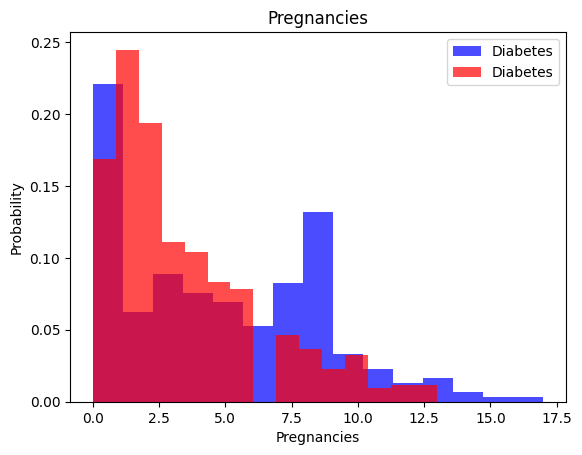

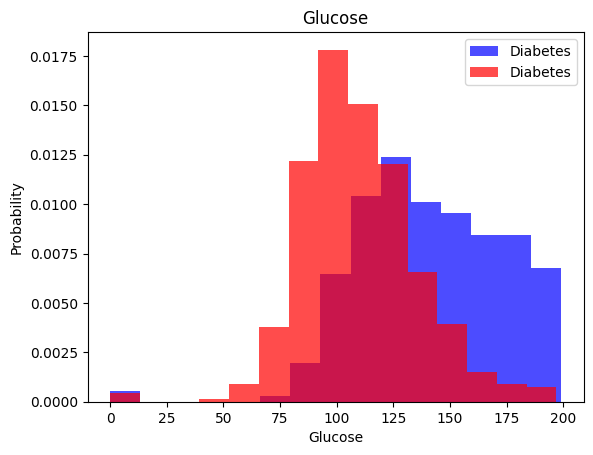

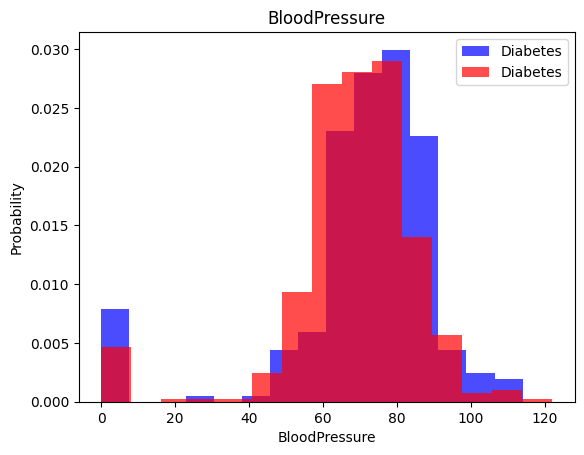

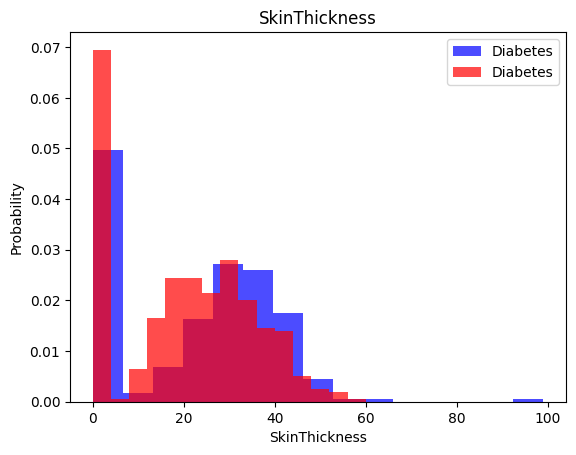

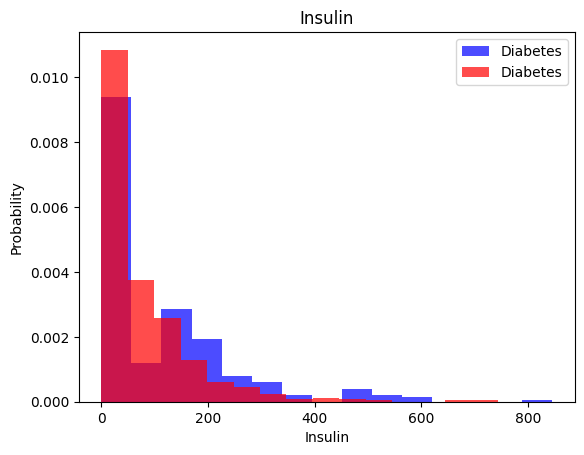

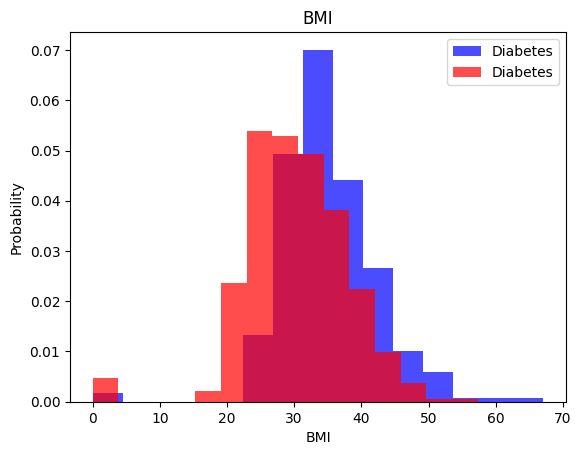

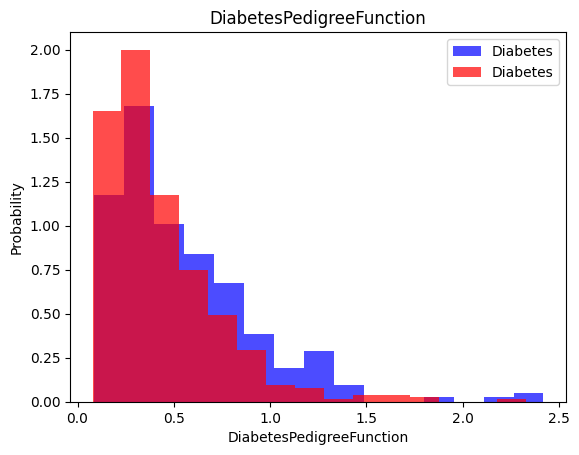

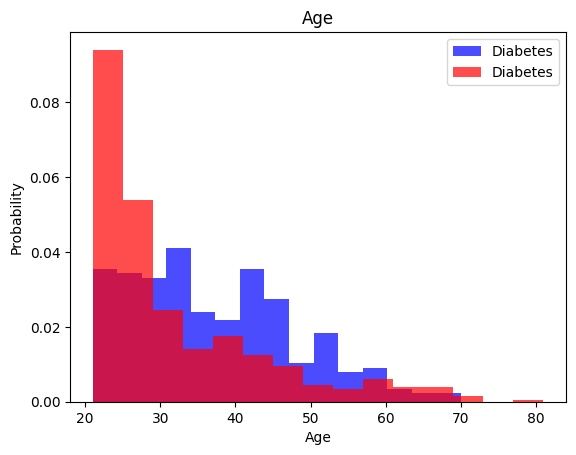

In [6]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df['Outcome'] == 1][label], color = 'blue', label = 'Diabetes', alpha = 0.7, density = True, bins = 15)
  plt.hist(df[df['Outcome'] == 0][label], color = 'red', label = 'Diabetes', alpha = 0.7, density = True, bins = 15)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [24]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values


In [25]:
X.shape, y.shape

((768, 8), (768,))

In [26]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [27]:
over = RandomOverSampler()
X, y = over.fit_resample(X, y)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [28]:
len(transformed_df[transformed_df["Outcome"]==1]), len(transformed_df[transformed_df["Outcome"]==0])

(500, 500)

In [29]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [30]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(16, activation='relu'), # if x <= 0 --> 0, x > 0 --> x
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

In [31]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [32]:
model.evaluate(X_train, y_train)

19/19 [==============================] - 0s 1ms/step - loss: 0.6494 - accuracy: 0.5917


[0.6494371294975281, 0.5916666388511658]

In [33]:
model.evaluate(X_valid, y_valid)

7/7 [==============================] - 0s 2ms/step - loss: 0.6611 - accuracy: 0.5750


[0.6610934734344482, 0.574999988079071]

In [34]:
model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
38/38 [==============================] - 1s 4ms/step - loss: 0.6280 - accuracy: 0.6583 - val_loss: 0.6117 - val_accuracy: 0.6900
Epoch 2/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5943 - accuracy: 0.6950 - val_loss: 0.5823 - val_accuracy: 0.6750
Epoch 3/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5726 - accuracy: 0.7150 - val_loss: 0.5616 - val_accuracy: 0.6950
Epoch 4/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5561 - accuracy: 0.7217 - val_loss: 0.5432 - val_accuracy: 0.7100
Epoch 5/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5413 - accuracy: 0.7250 - val_loss: 0.5312 - val_accuracy: 0.7200
Epoch 6/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5313 - accuracy: 0.7433 - val_loss: 0.5202 - val_accuracy: 0.7150
Epoch 7/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5217 - accuracy: 0.7383 - val_loss: 0.5084 - val_accuracy: 0.7350
Epoch 8/20
38/38 [==

In [35]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.4627 - accuracy: 0.7850


[0.4627128541469574, 0.7850000262260437]